In [1]:
import pandas as pd
from konlpy.tag import Okt
from konlpy.tag import Mecab
import re

okt = Okt()
mecab = Mecab()

In [2]:
df = pd.read_csv('맛집리뷰.csv')

C:\Users\sb\anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
del df['Unnamed: 0']
columns = ['리뷰', '평점', '답변', '예약여부', '상호명']

In [4]:
df.columns = columns

In [5]:
df = df[['리뷰','평점']]

In [6]:
df['평점'].iloc[1396211]

nan

In [7]:
#크롤링 도중 오류가 발생한 데이터 삭제
df = df.dropna()
df = df.iloc[:1143500]

In [8]:
df['평점'] = df['평점'].astype(float)

평균평점: 4.563667686926104


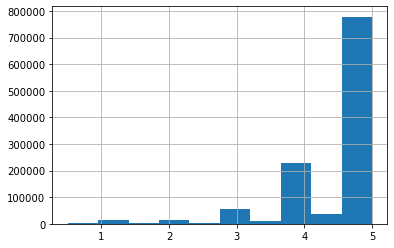

In [9]:
df['평점'].hist()
print('평균평점:',df['평점'].mean())

전반적으로 리뷰들의 평점이 높다.

In [10]:
review_list = list(df['리뷰'])

In [11]:
review_list[:10]

['친절하시고 맛있었어요 ',
 '주문:티본세트700g\n평:스테이크에서 뼈조각이 많이 나와서 당황스러웠어요.맛도 가격대비 크게 훌륭하진 않았습니다.\n여러모로 아쉬운 식사였습니다.',
 '분위기, 맛 괜찮았어요',
 '맛있어요 ~~ ',
 '서비스와 맛 모두 만족합니다 ~^^',
 '서비스도 친절하고, 음식도 맛있었어요.\n친구들 데리고 갔는데 다들 잘 먹어서 만족스러웠습니다.',
 '600g 드세요 그이상은 너무 많고 배불러요 비싸기만하고요',
 '게살파스타 진짜맛있었는데\n토마호그는 너무 질겼어요..ㅜ\n600g토마호그세트가있는데 세트인데 600g이품절이라고\n800g 900g남아있다고하셨는데\n오후1시였는데 품절됬다니\n좀 당황스럽고 일부러 큰거팔아서 마진남기려는느낌들었어요.;;;;\n직원분들은친절해서좋았습니다',
 '모힝 음식 맛있어요',
 '친절한 서비스']

# Mecab

In [12]:
test = mecab.pos(review_list[1])
test

[('주문', 'NNG'),
 (':', 'SC'),
 ('티', 'NNG'),
 ('본', 'VV+ETM'),
 ('세트', 'NNG'),
 ('700', 'SN'),
 ('g', 'SL'),
 ('평', 'NNG'),
 (':', 'SC'),
 ('스테이크', 'NNG'),
 ('에서', 'JKB'),
 ('뼈', 'NNG'),
 ('조각', 'NNG'),
 ('이', 'JKS'),
 ('많이', 'MAG'),
 ('나와서', 'VV+EC'),
 ('당황', 'NNG'),
 ('스러웠', 'XSA+EP'),
 ('어요', 'EF'),
 ('.', 'SF'),
 ('맛', 'NNG'),
 ('도', 'JX'),
 ('가격', 'NNG'),
 ('대비', 'NNG'),
 ('크', 'VA'),
 ('게', 'EC'),
 ('훌륭', 'XR'),
 ('하', 'XSA'),
 ('진', 'EC+JX'),
 ('않', 'VX'),
 ('았', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('여러모로', 'MAG'),
 ('아쉬운', 'VA+ETM'),
 ('식사', 'NNG'),
 ('였', 'VCP+EP'),
 ('습니다', 'EF'),
 ('.', 'SF')]

In [13]:
test = mecab.pos(review_list[1])

test2 = []
for t1, t2 in test:
    if t2[0] in ['N', 'M', 'V', 'X']:
        test2.append(t1)

In [14]:
test2

['주문',
 '티',
 '본',
 '세트',
 '평',
 '스테이크',
 '뼈',
 '조각',
 '많이',
 '나와서',
 '당황',
 '스러웠',
 '맛',
 '가격',
 '대비',
 '크',
 '훌륭',
 '하',
 '않',
 '여러모로',
 '아쉬운',
 '식사',
 '였']

In [16]:
review_token = []
for review in review_list:
    review = re.sub('([a-zA-Z])','',review)
    review = re.sub('[ㄱ-ㅎㅏ-ㅣ]+','',review)
    review = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…;》\n]','',review)
    review_token.append(mecab.nouns(review))

In [18]:
review_list[0]

'친절하시고 맛있었어요 '

In [17]:
review_token[:10]

[['친절'],
 ['주문', '티', '세트', '평', '스테이크', '뼈', '조각', '당황', '맛', '가격', '대비', '식사'],
 ['분위기', '맛'],
 [],
 ['서비스', '맛', '만족'],
 ['서비스', '친절', '음식', '친구', '만족'],
 ['이상'],
 ['게살',
  '파스타',
  '토마',
  '호그',
  '토마호',
  '세트',
  '세트',
  '이',
  '품절',
  '오후',
  '시',
  '품절',
  '당황',
  '거',
  '마진',
  '직원',
  '친절'],
 ['힝', '음식'],
 ['친절', '서비스']]

In [19]:
from gensim import corpora
dictionary = corpora.Dictionary(review_token)
corpus = [dictionary.doc2bow(text) for text in review_token]

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
import gensim
#토픽 5개
NUM_TOPICS = 5 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=20)